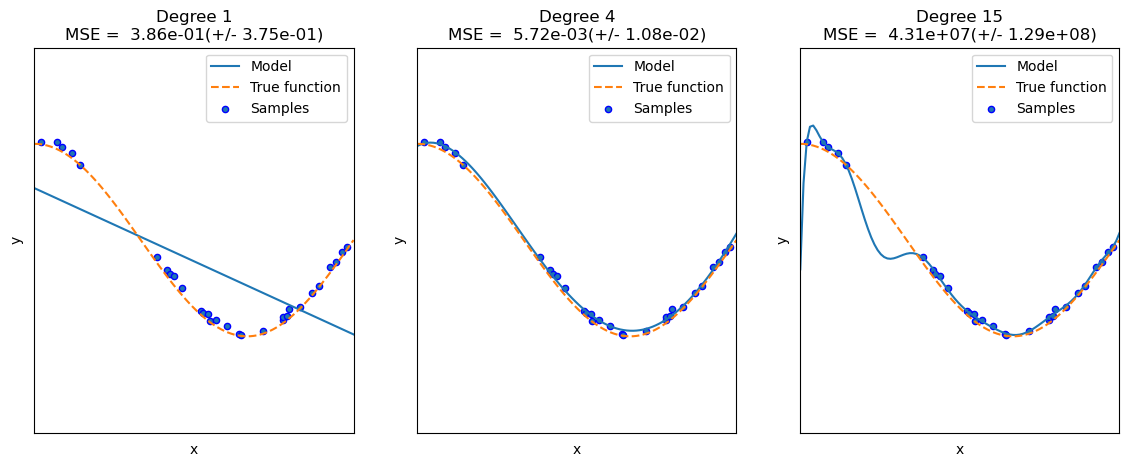

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def cof(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = cof(X) + np.random.rand(n_samples) * 0.1

plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('pf', polynomial_features), ('lr', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
    coef = pipeline.named_steps['lr'].coef_
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    plt.plot(X_test, cof(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt. legend(loc = 'best')
    plt.title('Degree {}\nMSE = {: .2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

alpha:[0, 0.1, 1, 10, 100]


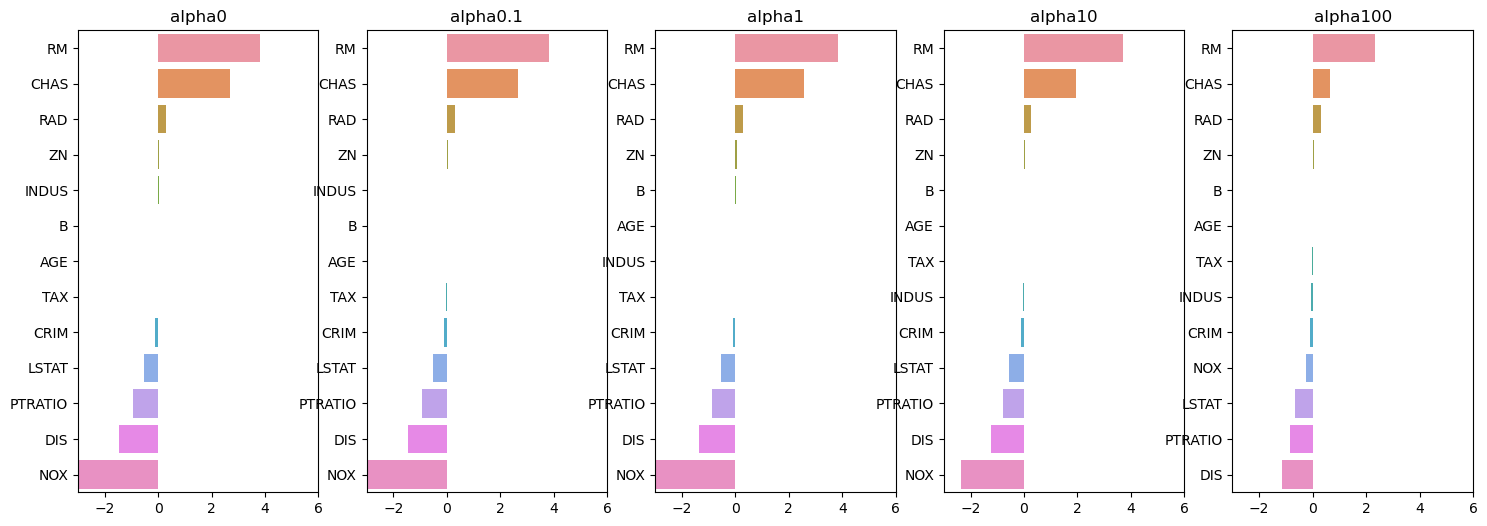

KeyError: 'alpha:[0, 0.1, 1, 10, 100]'

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

df = pd.DataFrame(boston.data , columns = boston.feature_names)

df['PRICE'] = boston.target

target = df['PRICE']
feature = df.drop(['PRICE'],axis=1,inplace=False)

fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
coef_df = pd.DataFrame()
alphas = [0, 0.1, 1, 10, 100]
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha)
    ridge.fit(feature, target)
    coef = pd.Series(data = ridge.coef_, index = feature.columns)
    coef_df['alpha' + str(alpha)] = coef
    coef = coef.sort_values(ascending = False)
    axs[i].set_title('alpha' + str(alpha))
    axs[i].set_xlim(-3, 6)
    sns.barplot(x = coef.values, y = coef.index, ax = axs[i])

    

columns = 'alpha:' + str(alphas)
print(columns)
plt.show()
coef_df.sort_values(by = columns, ascending = False)
    